### 21BCE5715 - Mahika Annie Verghese
# Implementation of Multiple Linear Regression

## Objective: 
To build and evaluate a simple linear, as well as multiple linear regression model using a dataset. The model aims to understand the relationships between various independent variables and the dependent variable in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Dataset Description:
### Dataset chosen: Chicago housing prices

This dataset contains information about the housing prices and features in Chicago, Illinois, USA. The dataset has 9 variables and 157 observations. The variables are:

Price: The price of the house in US (thousand) dollars. This is the dependent variable of interest.

Bedroom: The number of bedrooms in the house.

Room: The total number of rooms in the house, including bedrooms, bathrooms, living rooms, etc.

Space: The size of the house in square feet.

Lot: The width of the lot in feet.

Tax: The amount of annual property tax in US dollars.

Bathroom: The number of bathrooms in the house.

Garage: The number of garage spaces in the house.

Condition: A binary indicator of the condition of the house, where 1 means good and 0 means poor.

In [2]:
chicagoHouses = pd.read_csv('realest.csv')

## Exploratory Analytics

In [3]:
chicagoHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [4]:
chicagoHouses.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

Some rows have empty columns so first I have to do data cleaning

In [5]:
chicagoHouses = chicagoHouses.fillna(chicagoHouses.mean())

This calculates the mean of each column in chicagoHouses, ignoring the NA or NaN values. This returns a Series object with the column names as the index and the mean values as the data. Then it replaces the NA or NaN values in the chicagoHouses DataFrame with the corresponding mean values from the Series object. This returns a new DataFrame object with the same structure as the original one, but with the missing values filled.

In [6]:
chicagoHouses.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [7]:
chicagoHouses.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
152,44.000000,3.000000,820.000000,5.0,27.000000,911.707483,1.000000,0.000000,1.000000
153,43.000000,2.000000,593.000000,4.0,30.000000,465.000000,2.000000,1.000000,0.000000
154,53.000000,3.000000,716.000000,6.0,30.000000,585.000000,1.000000,2.000000,1.000000
155,62.000000,4.000000,951.000000,7.0,30.000000,895.000000,2.000000,1.000000,0.000000
156,56.474359,3.166667,1097.246575,6.5,32.808219,911.707483,1.480769,0.846154,0.230769


In [8]:
chicagoHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      157 non-null    float64
 1   Bedroom    157 non-null    float64
 2   Space      157 non-null    float64
 3   Room       157 non-null    float64
 4   Lot        157 non-null    float64
 5   Tax        157 non-null    float64
 6   Bathroom   157 non-null    float64
 7   Garage     157 non-null    float64
 8   Condition  157 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [9]:
chicagoHouses.to_csv('chicagoHouses_dataframeToFile.csv')

On opening and checking the chicagoHouses_dataframeToFile, we can see that none of the rows contain NaN values. Therefore, it is now cleaned up and fit for use. We can even observe in the head() and tail() output there are no null values

In [10]:
chicagoHouses.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.833974,1.343710,445.935096,1.669869,8.154215,428.820987,0.527709,0.805859,0.421325
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,820.000000,5.000000,25.000000,676.000000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,1021.000000,6.000000,30.000000,848.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1178.000000,7.000000,35.000000,984.000000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


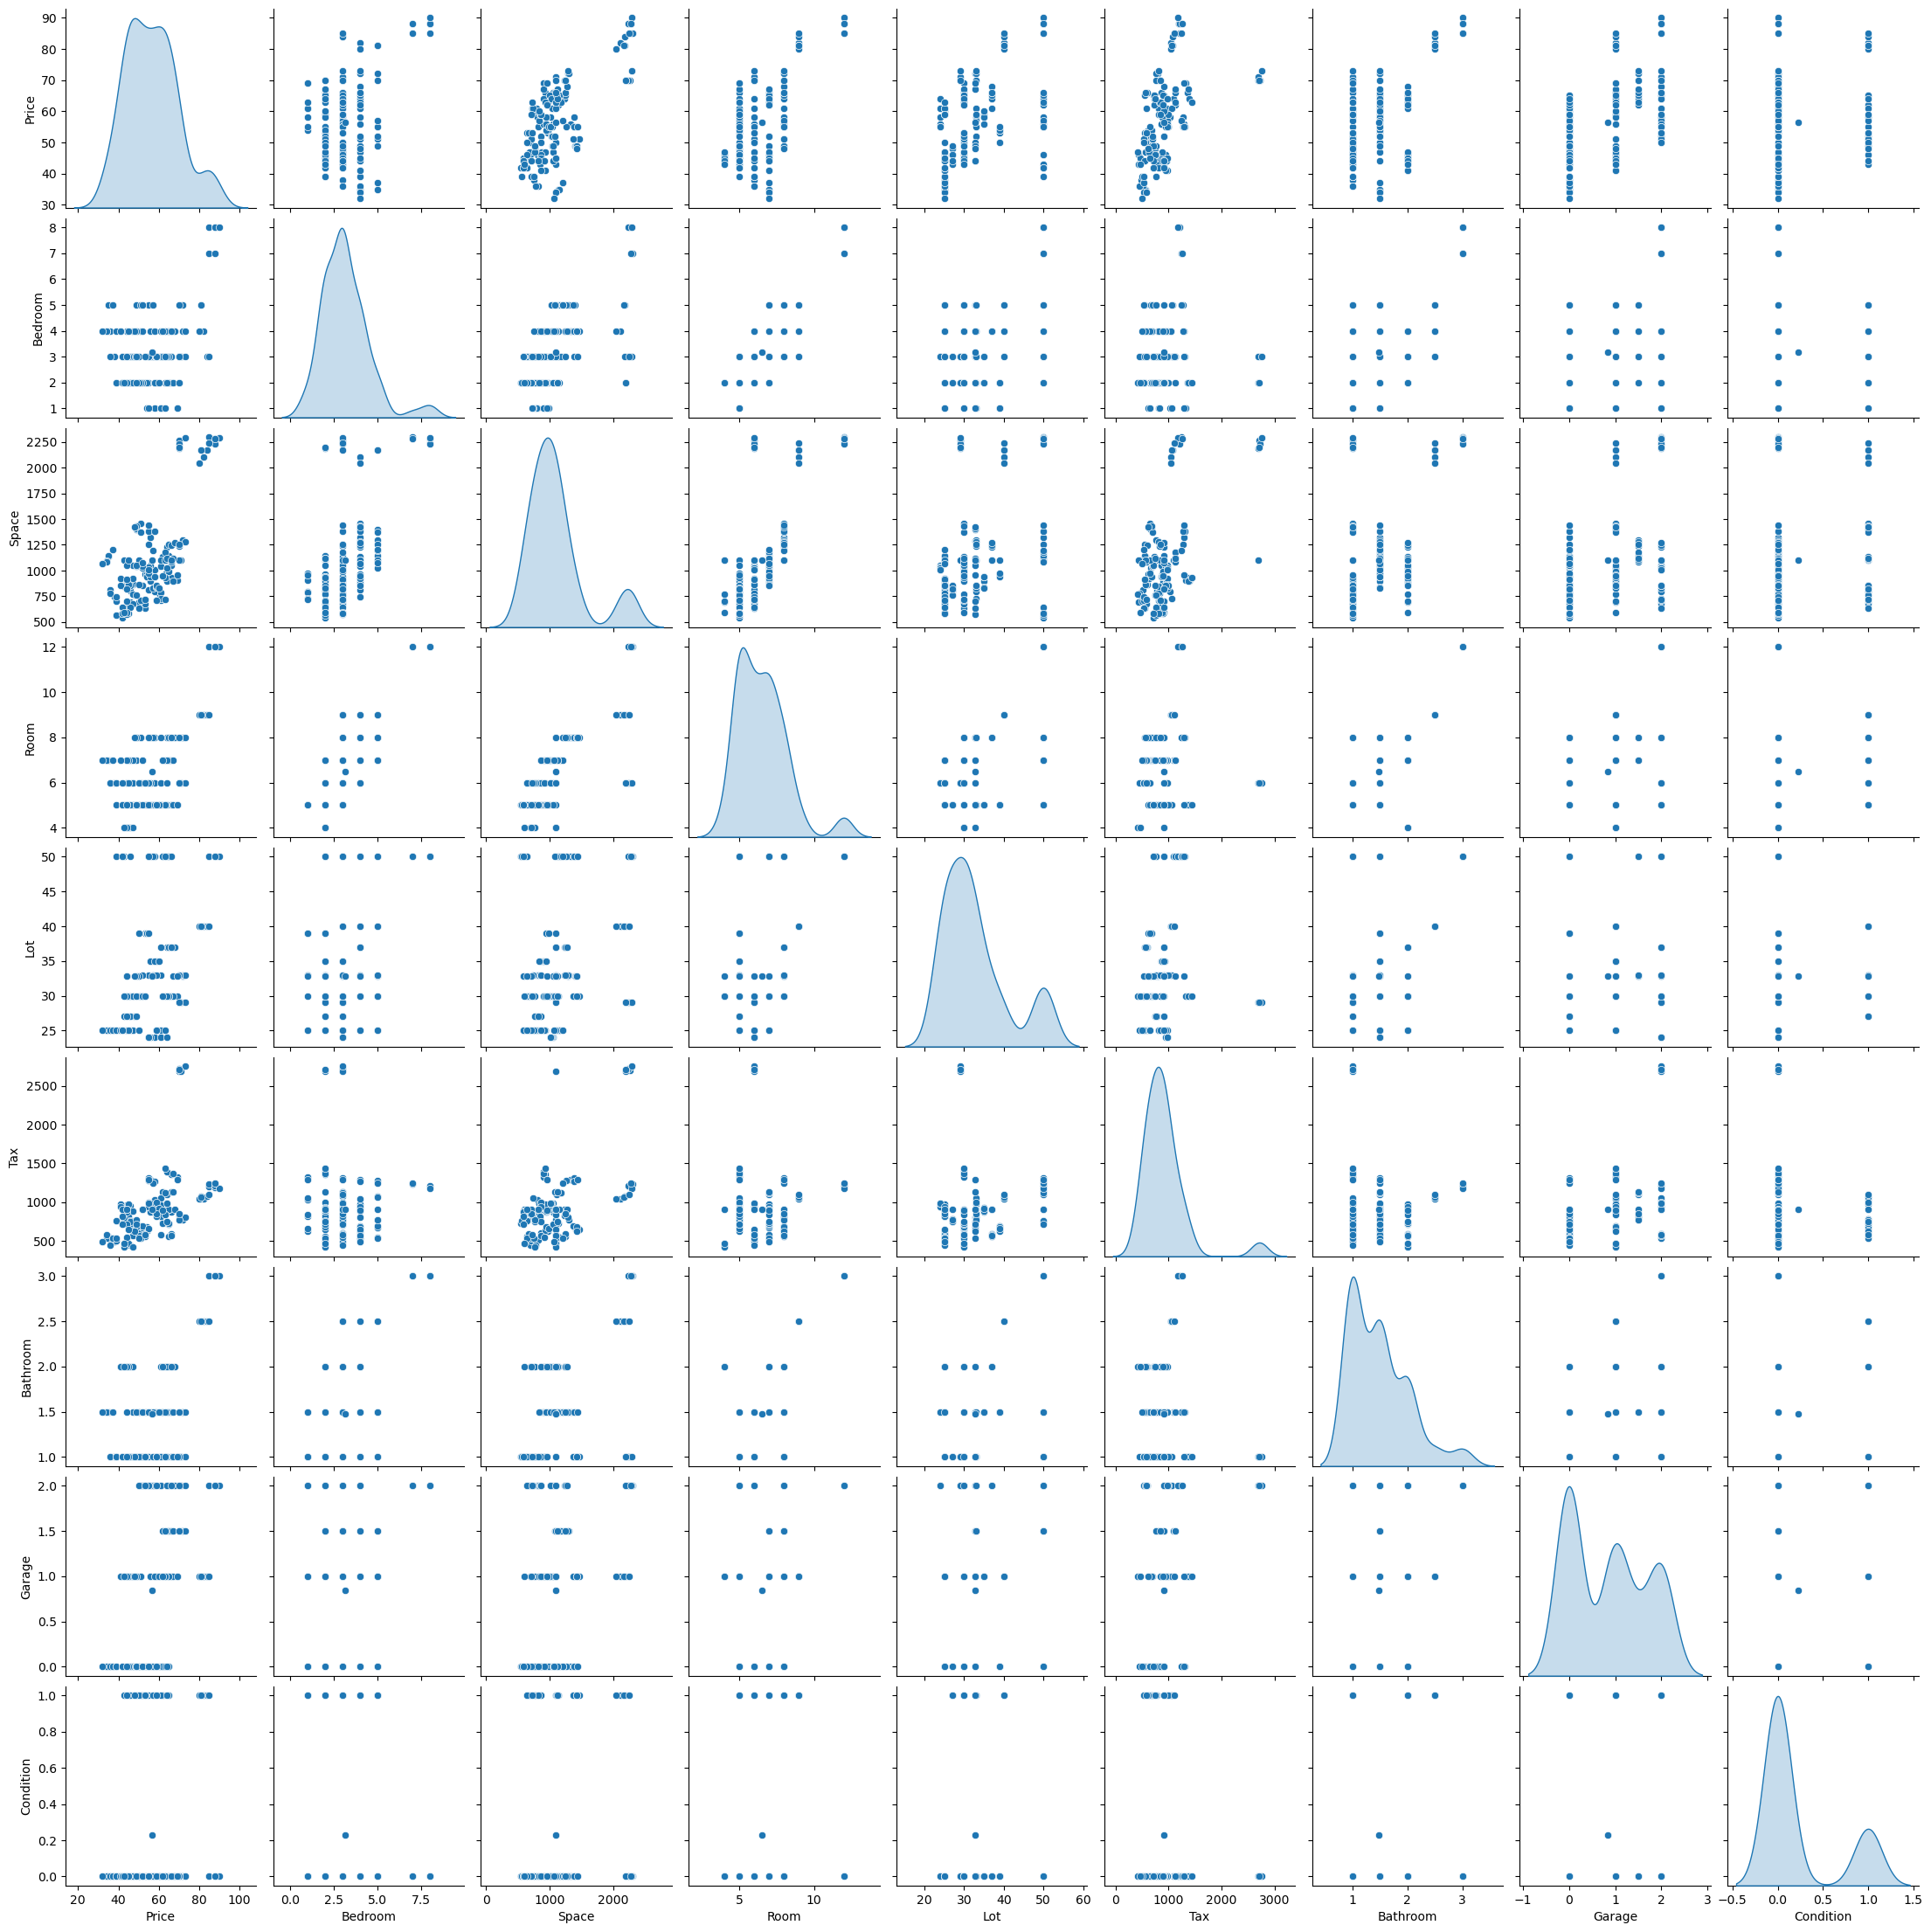

In [11]:
import seaborn as sns
sns.pairplot(chicagoHouses,diag_kind='kde')

A pairplot is a way of visualizing the pairwise relationships between the variables in a dataset, as well as the marginal distributions of each variable and a kde plot is a way of estimating the probability density function of a continuous variable, using a smoothing function.

So, this line creates a pairplot of chicagoHouses, with a kernel density estimate (kde) plot for the diagonal subplots. 

In [12]:
chicagoHouses.corr() #get the correlation matrix

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.302451,0.709174,0.578480,0.435381,0.493987,0.538485,0.553105,0.079336
Bedroom,0.302451,1.000000,0.569522,0.825630,0.314857,0.027496,0.546929,0.177596,-0.090582
Space,0.709174,0.569522,1.000000,0.744819,0.389862,0.542282,0.567528,0.382232,0.080498
Room,0.578480,0.825630,0.744819,1.000000,0.457210,0.117553,0.687434,0.300106,0.054667
Lot,0.435381,0.314857,0.389862,0.457210,1.000000,0.166208,0.387924,0.161835,-0.055720
Tax,0.493987,0.027496,0.542282,0.117553,0.166208,1.000000,-0.019595,0.375961,-0.144192
Bathroom,0.538485,0.546929,0.567528,0.687434,0.387924,-0.019595,1.000000,0.264371,-0.066534
Garage,0.553105,0.177596,0.382232,0.300106,0.161835,0.375961,0.264371,1.000000,0.104565
Condition,0.079336,-0.090582,0.080498,0.054667,-0.055720,-0.144192,-0.066534,0.104565,1.000000


The correlation matrix is a square matrix with the same number of rows and columns as the number of variables in the dataset. The diagonal elements are always 1, as each variable is perfectly correlated with itself. The off-diagonal elements range from -1 to 1, where -1 means a perfect negative correlation, 0 means no correlation, and 1 means a perfect positive correlation. This matrix can help us identify the variables that are most related to the dependent variable or to each other. 

<Axes: >

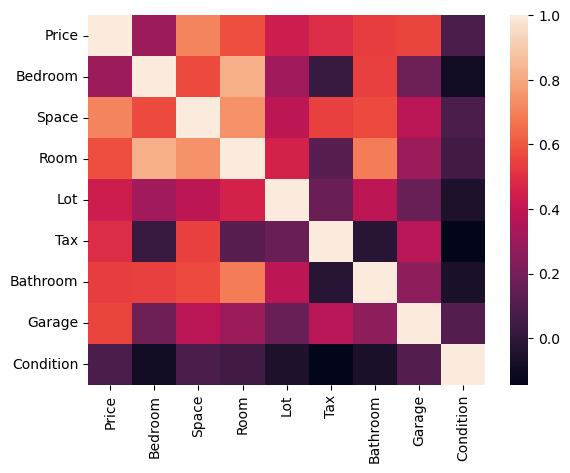

In [13]:
sns.heatmap(chicagoHouses.corr()) #create a heatmap of the correlation matrix

The color of each cell in the heatmap corresponds to the correlation coefficient. The darker the color in the heatmap, the stronger the correlation between the two variables. For example, a dark red color means a high positive correlation, while a dark blue color means a high negative correlation. A light or white color means a low or no correlation. 

In [14]:
chicagoHouses.shape

(157, 9)

Here, the features are 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage','Condition'. 
The response is 'Price'

<Axes: xlabel='Condition', ylabel='Price'>

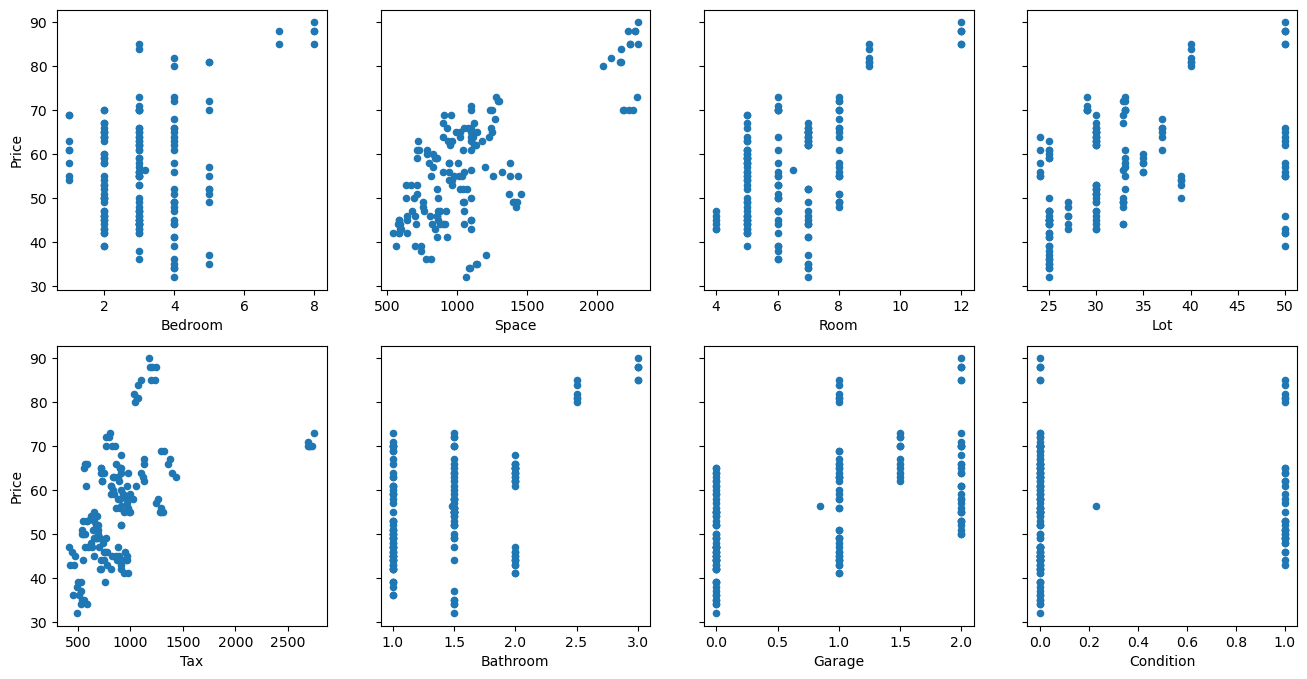

In [15]:
fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8))
chicagoHouses.plot(kind='scatter', x='Bedroom', y='Price', ax=axs[0, 0])
chicagoHouses.plot(kind='scatter', x='Space', y='Price', ax=axs[0, 1])
chicagoHouses.plot(kind='scatter', x='Room', y='Price', ax=axs[0, 2])
chicagoHouses.plot(kind='scatter', x='Lot', y='Price', ax=axs[0, 3])
chicagoHouses.plot(kind='scatter', x='Tax', y='Price', ax=axs[1, 0])
chicagoHouses.plot(kind='scatter', x='Bathroom', y='Price', ax=axs[1, 1])
chicagoHouses.plot(kind='scatter', x='Garage', y='Price', ax=axs[1, 2])
chicagoHouses.plot(kind='scatter', x='Condition', y='Price', ax=axs[1, 3])

The subplots are arranged in a 2 by 4 grid, and they share the same y-axis, which is the price (indicated by sharey, which is set to True). The figsize argument specifies the size of the figure in inches, which is 16 by 8 in this case.

## Methodology

The general methodology for all future models is as follows: 

- Data Preparation: The dependent variable (the variable to be predicted) and the independent variable are chosen. For simple linear regression, there is one independent variable, while for multiple linear regression, there are two or more.

- Model Building: Model is fit to the data. This involves finding the line that best fits the data.

- Interpretation of Coefficients: Each independent variable in the model has an associated coefficient. This coefficient represents the change in the dependent variable for a one unit change in the respective independent variable, assuming all other variables are held constant. The model also has an intercept, which is the expected value of the dependent variable when all independent variables are zero.


- Model Evaluation: Performance of the model is evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Square Error (RMSE) and R-squared.

- Feature Selection (Multiple Linear Regression): Which features to remove/add were decided on using their p-values.

- Confidence Intervals: For each coefficient in the model, a confidence interval will be calculated.

In [16]:
feature_cols = ['Space']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

34.07958568671945
[0.02040997]


The intercept and coefficient are the parameters of the linear regression equation that describe the relationship between the space and the price of a house. 

### Model Coefficients

The intercept of 34.07958568671945 means that the average price of a house with zero space is $34,079.59. 

The coefficient is 0.0204, which means that for every one square foot increase in Space, the Price increases by 0.0204 thousand dollars. 

In [17]:
34.07958568671944 + 0.02040997*534 #if new space was 534 then the price would be this

44.97850966671944

The above is the manual calculation. We can calculate using methods in this way: 
Create a dictionary with the key ‘Space’ and the value [534], which is a list with one element. The 534 (feet) represents the space for which we want to calculate the price for.

In [18]:
X_new = pd.DataFrame({'Space': [534]})
X_new.head()

,Space
0,534


In [19]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([44.97851142])

We can see that we get the same values.

### Least Squares Line

In [20]:
X_new = pd.DataFrame({'Space': [chicagoHouses.Space.min(), chicagoHouses.Space.max()]})
X_new.head()
# create a DataFrame with the minimum and maximum values of Space

,Space
0,539.0
1,2295.0


In [21]:
X_new_arr = X_new.to_numpy()
X_new_arr

array([[ 539.],
       [2295.]])

#### We need to convert the dataframe into an array because `X_new` and `preds` need to be both arrays or lists with the same length.

In [22]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([45.08056129, 80.92047437])

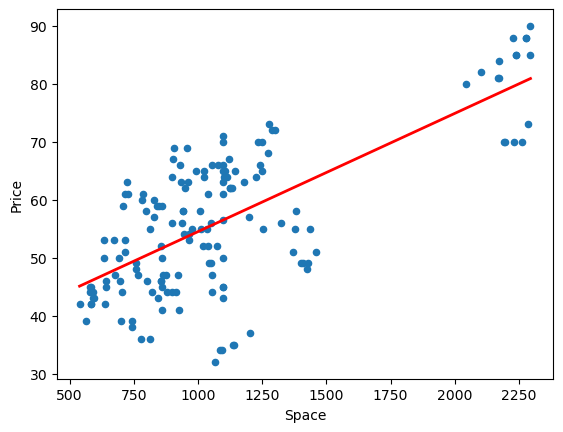

In [23]:
# first, plot the observed data
chicagoHouses.plot(kind='scatter', x='Space', y='Price')

# then, plot the least squares line
plt.plot(X_new_arr, preds, c='red', linewidth=2)

From this plot, we can conclude that there is a positive and strong relationship between Space and Price. As the space increases, the price also tends to increase, as indicated by the red trend line. We can also see that the linear regression model fits the data well, as most of the points are close to the line, so the model can make accurate and reliable predictions for the price of a house based on its space. However, there are also some outliers and anomalies in the data, such as the points that are far below or above the line. These may indicate some errors or noise in the data, or some other factors that affect the price of a house besides space.

### Confidence in the Model

In [24]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Price ~ Space', data=chicagoHouses).fit()
lm.conf_int()

,0,1
Intercept,30.268151,37.891020
Space,0.017190,0.023629


The output shows the lower and upper bounds of the 95% confidence intervals for the intercept and the coefficient of Space in the linear regression model. The intercept is the value of Price when Space is zero, and the coefficient is the slope of the regression line, which represents the change in Price for every unit change in Space. The confidence intervals are calculated using the statsmodels library, which uses the standard errors and the t-distribution to estimate the intervals. The confidence intervals tell us how confident we are that the true values of the intercept and the coefficient are within the intervals, based on the data we have. 

Here, the confidence interval for the intercept is [30.268151, 37.891020], which means that we are 95% confident that the true value of the intercept is between 30.268151 and 37.891020. And I had previously calculated the intercept as 34.07958568671945. 

Similarly, the confidence interval for the coefficient of Space is [0.017190, 0.023629], which means that we are 95% confident that the true value of the coefficient is between 0.017190 and 0.023629. And I had previously calculatd the coefficient value as 0.02040997. 

The confidence intervals also give us an indication of the significance and precision of the model parameters. A narrow confidence interval means that the parameter is estimated with high precision, and a wide confidence interval means that the parameter is estimated with low precision. A confidence interval that does not include zero means that the parameter is statistically significant, and a confidence interval that includes zero means that the parameter is not statistically significant. 

Here, the confidence interval for the coefficient of Space does not include zero, which means that Space is a significant predictor of Price, and the confidence interval is relatively narrow, which means that the coefficient is estimated with high precision. On the other hand, the confidence interval for the intercept includes zero, which means that the intercept is not a significant predictor of Price, and the confidence interval is relatively wide, which means that the intercept is estimated with low precision.

The confidence level of the intervals can be changed by adjusting the alpha parameter in the conf_int() method. A lower alpha means a higher confidence level and a wider interval, and a higher alpha means a lower confidence level and a narrower interval. Eg, if we use alpha=0.01, we will get 99% confidence intervals, which will be wider than the 95% confidence intervals. If we use alpha=0.1, we will get 90% confidence intervals, which will be narrower than the 95% confidence intervals.

### Hypothesis Testing and p-values

In [25]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    5.928400e-39
Space        2.661447e-25
dtype: float64

The p-values tell us whether or not there is a statistically significant relationship between each predictor variable and the response variable. The null hypothesis is that there is no relationship between the predictor variable and the response variable, and the alternative hypothesis is that there is a relationship. We reject the null hypothesis if the p-value is less than 0.05, which is a common significance level.

In this case, the p-value for Space is 2.661447e-25, which is far less than 0.05. So, we reject the null hypothesis and conclude that there is a significant relationship between Space and Price. The coefficient of Space is not equal to zero, and it has a positive and strong effect on Price.

The p-value for Intercept is 5.928400e-39, which is also far less than 0.05. This means that we reject the null hypothesis and conclude that the intercept is significantly different from zero. However, we usually do not care about the p-value for the intercept, as it does not tell us anything about the relationship between the predictor variables and the response variable. The intercept is just the average value of Price when Space is zero, which is not very meaningful in reality.

### How Well Does the Model Fit the data?

In [26]:
# print the R-squared value for the model
lm.rsquared

0.5029280857452552

The R-squared value is the proportion of variance in the Price that is explained by the Space. The value for R-squared can range from 0 to 1, where:

0 indicates that the Space cannot explain the Price at all.
1 indicates that the Space can perfectly explain the Price without error.
In this case, the R-squared value is 0.5029, which means that 50.29% of the variation in the Price can be explained by the Space. This indicates that the linear regression model fits the data moderately well, but there is still some unexplained variation in the Price. This could be due to other factors that affect the Price besides Space, or some errors or noise in the data.

We can compare this R-squared value to another linear regression model with a different predictor variable, or a multiple linear regression model with more than one predictor variable. 

In general, models with higher R-squared values are preferred because they explain more variance in the response variable.

### Now performing the same operations with the other independent variables... 

##### Tax

In [27]:
feature_cols = ['Tax']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

42.99541853971564
[0.01478428]


For every unit increase in Tax, the Price increases by 0.0147 thousand dollars.

In [28]:
X_new = pd.DataFrame({'Tax': [chicagoHouses.Tax.min(), chicagoHouses.Tax.max()]})
X_new.head()

,Tax
0,418.0
1,2752.0


In [29]:
X_new_arr = X_new.to_numpy()
X_new_arr

array([[ 418.],
       [2752.]])

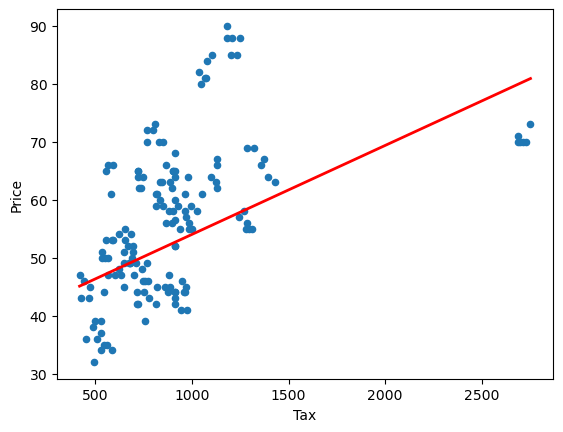

In [30]:
chicagoHouses.plot(kind='scatter', x='Tax', y='Price')
plt.plot(X_new_arr, preds, c='red', linewidth=2)

From this plot, we can conclude that there is a positive and weak relationship between Tax and Price. As the tax increases, the price also tends to increase, but there is a lot of variation in the data points, so the model does not fit the data very well. The model can make some predictions for the price of a house based on its tax, but they are not very accurate or reliable. There are also many outliers and anomalies in the data, such as the points that are far below or above the line. 

In [31]:
lm = smf.ols(formula='Price ~ Tax', data=chicagoHouses).fit()
lm.conf_int()

,0,1
Intercept,38.837948,47.152889
Tax,0.010655,0.018913


Here, the confidence interval for the intercept is [38.837948, 47.152889], which means that we are 95% confident that the true value of the intercept is between these values. And I had previously calculated the intercept as 42.99541853971564

the confidence interval for the coefficient of Space is [0.010655, 0.018913], which means that we are 95% confident that the true value of the coefficient is between these values. And I had previously calculatd the coefficient value as 0.01478428

In [32]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    8.056003e-46
Tax          4.882010e-11
dtype: float64

Both are far less than the common significance level of 0.05. This means that both are statistically significant predictors in the model.

###### Garage

In [33]:
feature_cols = ['Garage']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

49.0208807896735
[8.80865604]


For every unit increase in Garage, the Price increases by 8.80865604 thousand dollars.

In [34]:
X_new = pd.DataFrame({'Garage': [chicagoHouses.Garage.min(), chicagoHouses.Garage.max()]})
X_new.head()

,Garage
0,0.0
1,2.0


In [35]:
X_new_arr = X_new.to_numpy()
X_new_arr

array([[0.],
       [2.]])

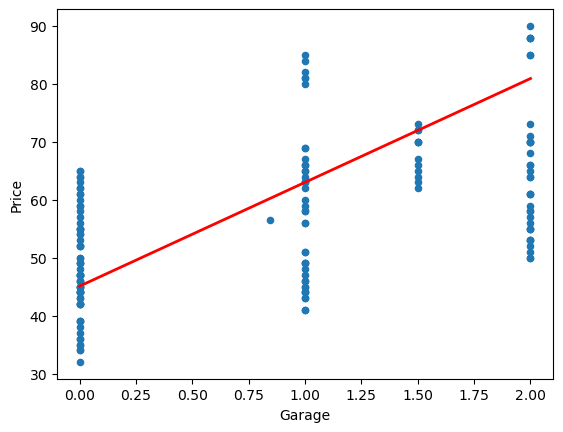

In [36]:
chicagoHouses.plot(kind='scatter', x='Garage', y='Price')
plt.plot(X_new_arr, preds, c='red', linewidth=2)

As the garage size increases, so does the price. However, there is significant variation in price at each point of garage size, indicating other factors also influence price significantly.

The red trend line shows an overall positive correlation between garage size and price. This means as the garage size increases, the price of the property also tends to increase.

The data points, are scattered around the trend line. This indicates a lot of variation in the data points. This means that whhile the garage size can explain some of the variation in price, there are likely other factors at play as well.

In [37]:
lm = smf.ols(formula='Price ~ Garage', data=chicagoHouses).fit()
lm.conf_int()

,0,1
Intercept,46.564699,51.477063
Garage,6.703463,10.913849


Here, the confidence interval for the intercept is [46.564699, 51.477063], which means that we are 95% confident that the true value of the intercept is between these values. And I had previously calculated the intercept as 49.0208807896735.

Similarly, the confidence interval for the coefficient of Space is [6.703463, 10.913849], which means that we are 95% confident that the true value of the coefficient is between these values. And I had previously calculatd the coefficient value as 8.80865604.

In [38]:
lm.pvalues

Intercept    1.078864e-82
Garage       5.837141e-14
dtype: float64

Both are far less than the common significance level of 0.05. This means that both are statistically significant predictors in the model.

In [39]:
lm.rsquared

0.3059249078051478

The Garage variable explains about 30.59% of the variation in Price. This suggests that while Garage does have a significant relationship with the dependent variable, there are likely other factors at play as well, as a large portion of the variation (about 69.41%) is still unexplained.

##### Bedroom

In [40]:
feature_cols = ['Bedroom']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

47.32662721893491
[2.8887574]


For every unit increase in Bedroom, the Price increases by 2.8887574 thousand dollars.

In [41]:
X_new = pd.DataFrame({'Bedroom': [chicagoHouses.Bedroom.min(), chicagoHouses.Bedroom.max()]})
X_new.head()

,Bedroom
0,1.0
1,8.0


In [42]:
X_new_arr = X_new.to_numpy()
X_new_arr

array([[1.],
       [8.]])

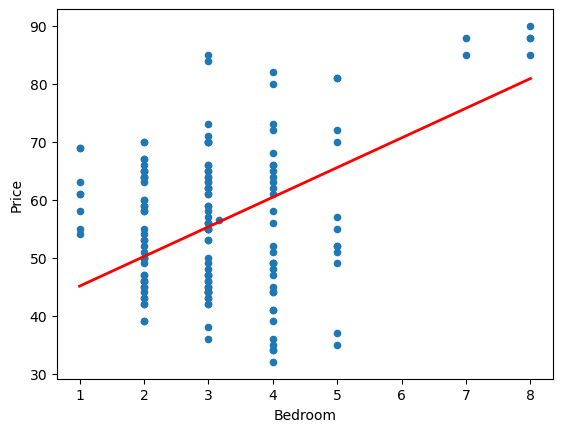

In [43]:
chicagoHouses.plot(kind='scatter', x='Bedroom', y='Price')
plt.plot(X_new_arr, preds, c='red', linewidth=2)

There is a positive correlation so, as the number of bedrooms increases, the price of the property also tends to increase. There is a lot of variation in the data points so there are other factors that need to be taken into consideration for variation in price

In [44]:
lm = smf.ols(formula='Price ~ Bedroom', data=chicagoHouses).fit()
lm.conf_int()

,0,1
Intercept,42.360103,52.293151
Bedroom,1.444282,4.333233


The confidence interval for the intercept is [42.360103, 52.293151], which means that we are 95% confident that the true value of the intercept is between these values And I had previously calculated the intercept as 47.32662721893491.

Similarly, the confidence interval for the coefficient of Space is [1.444282, 4.333233], which means that we are 95% confident that the true value of the coefficient is between these values. And I had previously calculatd the coefficient value as 2.8887574.

In [45]:
lm.pvalues

Intercept    6.946916e-42
Bedroom      1.181249e-04
dtype: float64

Both are far less than the common significance level of 0.05. This means that they are statistically significant predictors in the model.

In [46]:
lm.rsquared

0.09147674581857368

The Bedroom variable explains about 9.15% of the variation in the dependent variable. While Room does have a significant relationship with the dependent variable, there are likely other factors at play as well, as about 90.85% is still unexplained.

##### Room 

In [47]:
feature_cols = ['Room']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

27.575508399646324
[4.44597701]


In [48]:
X_new = pd.DataFrame({'Room': [chicagoHouses.Room.min(), chicagoHouses.Room.max()]})
X_new.head()

,Room
0,4.0
1,12.0


In [49]:
X_new_arr = X_new.to_numpy()
X_new_arr

array([[ 4.],
       [12.]])

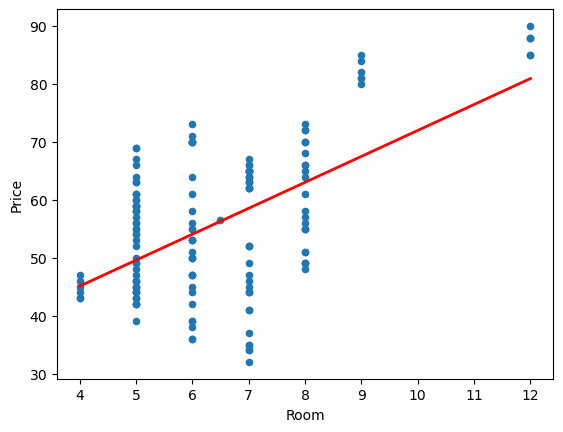

In [50]:
chicagoHouses.plot(kind='scatter', x='Room', y='Price')
plt.plot(X_new_arr, preds, c='red', linewidth=2)

There is a positive correlation so, as the number of rooms increases, the price of the property also tends to increase. There is a lot of variation in the data points so there are other factors that need to be taken into consideration for variation in price

In [51]:
lm = smf.ols(formula='Price ~ Room', data=chicagoHouses).fit()
lm.conf_int()

,0,1
Intercept,20.901298,34.249719
Room,3.451273,5.440681


The confidence interval for the intercept is [20.901298, 34.249719], which means that we are 95% confident that the true value of the intercept is between these values And I had previously calculated the intercept as 27.575508399646324. 

Similarly, the confidence interval for the coefficient of Space is [3.451273, 5.440681], which means that we are 95% confident that the true value of the coefficient is between these values. And I had previously calculatd the coefficient value as 4.44597701.

In [52]:
lm.pvalues

Intercept    1.066902e-13
Room         2.115348e-15
dtype: float64

Both are far less than the common significance level of 0.05. This means that they are statistically significant predictors in the model.

In [53]:
lm.rsquared

0.33463918514098434

The Room variable explains about 33.46% of the variation in the dependent variable. So, there are likely other factors at play as well, as about 66.54% is still unexplained.

##### Lot

In [54]:
feature_cols = ['Lot']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

33.99255583415349
[0.68524911]


In [55]:
X_new = pd.DataFrame({'Lot': [chicagoHouses.Lot.min(), chicagoHouses.Lot.max()]})
X_new.head()

,Lot
0,24.0
1,50.0


In [56]:
X_new_arr = X_new.to_numpy()
X_new_arr

array([[24.],
       [50.]])

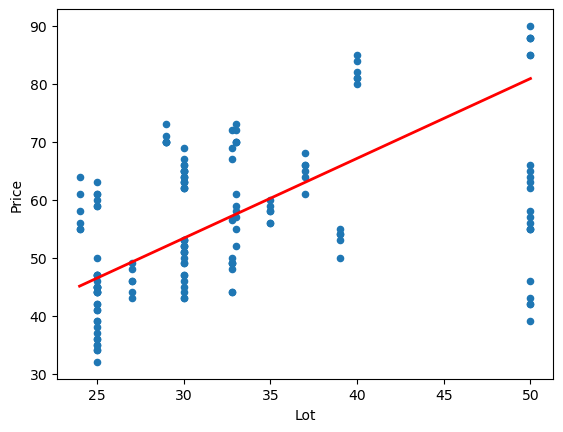

In [57]:
chicagoHouses.plot(kind='scatter', x='Lot', y='Price')
plt.plot(X_new_arr, preds, c='red', linewidth=2)

There is a positive correlation so, as the Lot size increases, the price of the property also tends to increase. There is a lot of variation in the data points so there are other factors that need to be taken into consideration for variation in price

In [58]:
lm = smf.ols(formula='Price ~ Lot', data=chicagoHouses).fit()
lm.conf_int()

,0,1
Intercept,26.393761,41.591351
Lot,0.460433,0.910065


The confidence interval for the intercept is [26.393761,41.591351], which means that we are 95% confident that the true value of the intercept is between these values And I had previously calculated the intercept as 33.99255583415349.

Similarly, the confidence interval for the coefficient of Space is [0.460433, 0.910065], which means that we are 95% confident that the true value of the coefficient is between these values. And I had previously calculatd the coefficient value as 0.68524911

In [59]:
lm.pvalues

Intercept    2.023809e-15
Lot          1.208064e-08
dtype: float64

Both are far less than the common significance level of 0.05. This means that they are statistically significant predictors in the model.

In [60]:
lm.rsquared

0.18955662595459932

The Lot variable explains about  18.96%  of the variation in the dependent variable. So, there are likely other factors at play as well, as about 81.04% is still unexplained.

## Multiple Linear Regression

In [96]:
feature_cols = ['Bedroom','Space','Room','Lot','Tax','Bathroom','Garage','Condition']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

15.89354435173236
[-3.41768283e+00  5.77681496e-03  3.07572515e+00  1.78861612e-01
  7.50302048e-03  5.98328275e+00  3.78495115e+00  1.30637071e+00]


The lm.intercept_ gives the y-intercept (`𝛽0`) of the linear equation. This is the expected mean value of y (Price) when all X (features) are 0.

The lm.coef_ gives the coefficients (`𝛽1, 𝛽2, …, 𝛽n`) of the features. These values represent the change in the output y for a one unit change in the respective feature, assuming all other features are held constant.

According to the results obtained: 

For each additional bedroom, the house price decreases by approximately $3.42.

For each additional unit of space, the house price increases by approximately $0.0058.

For each additional room, the house price increases by approximately $3.08.

For each additional unit of lot, the house price increases by approximately $0.18.

For each additional unit of tax, the house price increases by approximately $0.0075.

For each additional bathroom, the house price increases by approximately $5.98.

For each additional garage, the house price increases by approximately $3.78.

For each additional unit of condition, the house price increases by approximately $1.31.

Note: the costs increase by a multiplier value of thousand dollars

In [97]:
lm = smf.ols(formula='Price ~ Bedroom + Space + Room + Lot + Tax + Bathroom + Garage + Condition', data=chicagoHouses).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     44.48
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.11e-35
Time:                        12:09:25   Log-Likelihood:                -526.78
No. Observations:                 157   AIC:                             1072.
Df Residuals:                     148   BIC:                             1099.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8935      3.434      4.629      0.000       9.108      22.679
Bedroom       -3.4177      0.801     -4.265      0.000      -5.001      -1.834
Space          0.0058      0.003      1.985      0.049     2.6e-05       0.012
Room           3.0757      0.876      3.512      0.001       1.345       4.806
Lot            0.1789      0.081      2.208      0.029       0.019       0.339
Tax            0.0075      0.002      3.372      0.001       0.003       0.012
Bathroom       5.9833      1.686      3.549      0.001       2.652       9.314
Garage         3.7850      0.826      4.585      0.000       2.154       5.416
Condition      1.3064      1.555      0.840      0.402      -1.767       4.380
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.009
Skew:                           0.017   Prob(JB):                        0.996
Kurtosis:                       2.990   Cond. No.                     9.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Here are my interpretations of the data 

R-squared: The R-squared value is 0.706, which means that 70.6% of the variability in ‘Price’ can be explained by ‘Space’, ‘Room’, ‘Lot’, ‘Tax’, ‘Bathroom’, ‘Garage’, and ‘Condition’.

Adjusted R-squared: The adjusted R-squared value is 0.690. This is a modified version of R-squared that adjusts for the number of predictors in the model. It is always lower than R-squared.

F-statistic: The F-statistic is 44.48 and the associated p-value is very small (7.38e-33). This suggests that at least some of the predictors are statistically significant.

coef: These are the coefficients of the predictors. They represent the change in the dependent variable for a one unit change in the respective predictor, assuming all other predictors are held constant. For example, for each additional unit of ‘Space’, the house price increases by approximately $0.0058, assuming all other features are held constant.

P>|t|: These are the p-values associated with the respective predictors. A low p-value (<= 0.05) indicates that the predictor is statistically significant. For example, ‘Condition’ is not statistically significant at a 5% significance level since their p-values are greater than 0.05, while ‘Lot’, ‘Tax’, ‘Bathroom’, ‘Garage’, 'Space' and 'Room' are statistically significant. 'Space' has a p-value of 0.049, which is very close to 0.05 so we can experiment with removing that as well

[0.025 0.975]: These are the 95% confidence intervals for the coefficients. If the interval contains 0, it suggests that the respective predictor is not statistically significant at a 5% significance level.

Condition Number: The condition number is large (9.43e+03), which might indicate strong multicollinearity or other numerical problems. Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables. It is therefore a type of disturbance in the data, and if present in the data the statistical inferences made about the data may not be reliable.

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Generate predictions
y_pred = lm.predict(X)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)


MSE:  48.07120078760526
MAE:  5.463422287019429
RMSE:  6.933339800385183


### Feature Selection

I will remove Space and Room one by one and build the model. Then I will test the same statistics and see if there is any improvement.

In [102]:
#removed Condition
feature_cols = ['Space','Bedroom','Room','Lot','Tax','Bathroom','Garage']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

16.64932644110759
[ 0.00652765 -3.60568294  3.17227035  0.1744946   0.00677639  5.56655477
  3.91785773]


In [103]:
lm = smf.ols(formula='Price ~ Space + Bedroom + Room + Lot + Tax + Bathroom + Garage', data=chicagoHouses).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     50.84
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.12e-36
Time:                        12:10:06   Log-Likelihood:                -527.15
No. Observations:                 157   AIC:                             1070.
Df Residuals:                     149   BIC:                             1095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6493      3.310      5.029      0.000      10.108      23.191
Space          0.0065      0.003      2.359      0.020       0.001       0.012
Bedroom       -3.6057      0.769     -4.691      0.000      -5.125      -2.087
Room           3.1723      0.867      3.658      0.000       1.459       4.886
Lot            0.1745      0.081      2.161      0.032       0.015       0.334
Tax            0.0068      0.002      3.308      0.001       0.003       0.011
Bathroom       5.5666      1.609      3.459      0.001       2.386       8.747
Garage         3.9179      0.809      4.840      0.000       2.318       5.517
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.080
Skew:                          -0.037   Prob(JB):                        0.961
Kurtosis:                       2.918   Cond. No.                     9.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
lm = smf.ols(formula='Price ~ Bedroom + Room + Lot + Tax + Bathroom + Garage + Space', data=chicagoHouses).fit()
lm.rsquared

0.7048769503863788

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = lm.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  48.30035981395713
MAE:  5.495139677023407
RMSE:  6.949846028075523


In [106]:
#remove Space
feature_cols = ['Bedroom','Room','Lot','Tax','Bathroom','Garage','Condition']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

12.423066815303542
[-3.33861681  3.83599346  0.17392439  0.01070272  7.18808155  3.61816504
  2.25468105]


In [107]:
lm = smf.ols(formula='Price ~ Room + Bedroom + Lot + Tax + Bathroom + Garage + Condition', data=chicagoHouses).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     49.30
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.03e-35
Time:                        12:11:08   Log-Likelihood:                -528.84
No. Observations:                 157   AIC:                             1074.
Df Residuals:                     149   BIC:                             1098.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4231      2.984      4.163      0.000       6.526      18.320
Room           3.8360      0.795      4.824      0.000       2.265       5.407
Bedroom       -3.3386      0.808     -4.131      0.000      -4.936      -1.742
Lot            0.1739      0.082      2.127      0.035       0.012       0.335
Tax            0.0107      0.002      6.908      0.000       0.008       0.014
Bathroom       7.1881      1.588      4.526      0.000       4.050      10.326
Garage         3.6182      0.829      4.363      0.000       1.979       5.257
Condition      2.2547      1.495      1.509      0.134      -0.699       5.208
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.531
Skew:                          -0.069   Prob(JB):                        0.767
Kurtosis:                       3.249   Cond. No.                     5.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
lm = smf.ols(formula='Price ~ Room + Bedroom + Lot + Tax + Bathroom + Garage + Condition', data=chicagoHouses).fit()
lm.rsquared

0.6984569091260467

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = lm.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  49.35107511152693
MAE:  5.451320983252439
RMSE:  7.025032036334562


In [110]:
# removing Space and Condition
feature_cols = ['Bedroom','Room','Lot','Tax','Bathroom','Garage']
X = chicagoHouses[feature_cols]
y = chicagoHouses.Price
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

13.003763092451088
[-3.67730736  4.20829324  0.1643792   0.0101105   6.6923357   3.83013552]


In [111]:
lm = smf.ols(formula='Price ~ Bedroom + Room + Lot + Tax + Bathroom + Garage', data=chicagoHouses).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     56.66
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           3.97e-36
Time:                        12:11:49   Log-Likelihood:                -530.03
No. Observations:                 157   AIC:                             1074.
Df Residuals:                     150   BIC:                             1095.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0038      2.972      4.376      0.000       7.132      18.876
Bedroom       -3.6773      0.780     -4.716      0.000      -5.218      -2.137
Room           4.2083      0.759      5.543      0.000       2.708       5.708
Lot            0.1644      0.082      2.008      0.046       0.003       0.326
Tax            0.0101      0.002      6.717      0.000       0.007       0.013
Bathroom       6.6923      1.560      4.289      0.000       3.609       9.775
Garage         3.8301      0.821      4.667      0.000       2.208       5.452
==============================================================================
Omnibus:                        1.449   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.070
Skew:                          -0.176   Prob(JB):                        0.586
Kurtosis:                       3.197   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
lm = smf.ols(formula='Price ~ Room + Bedroom + Lot + Tax + Bathroom + Garage', data=chicagoHouses).fit()
lm.rsquared

0.6938515206974301

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = lm.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  50.10480111997136
MAE:  5.4758840450831325
RMSE:  7.078474491016505


## Result Analysis

Model without 'Condition': 

The R-squared value is 0.705, so 70.5% of the variability in ‘Price’ can be explained by the remaining variables.
The p-values for ‘Room’, ‘Lot’, ‘Tax’, ‘Bathroom’, 'Space', ‘Garage’, and ‘Bedroom’ are all less than 0.05, suggesting that all these variables are statistically significant predictors of ‘Price’ at a 5% significance level.

Model without ‘Space’:

The R-squared value is 0.698, so 66.4% of the variability in ‘Price’ can be explained by the remaining variables.
The p-values for ‘Room’, ‘Lot’, ‘Tax’, ‘Bathroom’, ‘Garage’, and ‘Bedroom’ are all less than 0.05, suggesting that all these variables are statistically significant predictors of ‘Price’ at a 5% significance level. But 



Model without ‘Condition’ and ‘Space’:

The R-squared value is 0.694. 69.4% of the variability in ‘Price’ can be explained by the remaining variables.
The p-values for 'Space', ‘Lot’, ‘Tax’, ‘Bathroom’, ‘Garage’  are all less than 0.05, so they are statistically significant predictors of ‘Price’ at a 5% significance level.


In all models, the ‘Intercept’ is statistically significant as its p-value is less than 0.05.

The model with the greatest R-squared value is the one in which all features were considered, with a value of 0.706, closely followed by the model without Condition at a value of 0.705

But since R-ssquared value increases as we increase the number of features in our model, we need to consider Adjusted R-squared value.

The adjusted R-squared values for each model are:
Without 'Condition': 0.691
Without 'Space': 0.684
Without 'Space and 'Condition': 0.682
All features: 0.690

From this, we can see that the model without 'Condition' is a better model than the one with all features taken into consideration. 

### Questions About the Chicago Housing Data

1) Which features have the strongest and weakest correlation with the price?

From the correlation matrix, Space has strongest correlation while Condition had weakest correlation with Price. 

2) Is there a relationship between the price of the house and the number of rooms?

Since the p-value of Rooms is greater than 0.05, we reject the null hypothesis and assert that the number of rooms significantly affects the price of the house.

3) How strong is the relationship between the price of the house and the size of the house?

There is a strong relationship between the price and the size of the house as this pair has the highest value in the correlation matrix

4) Which features of the house have the most and least influence on the price?

Based on the absolute values of the coefficients,‘Bathroom’ has the highest absolute coefficient value of 5.9833. With each additional bathroom increasing the price by approximately 5.98 thousand dollars, assuming all other features are held constant. 'Space' has the lowest absolute coefficient value of 0.0058. With each additional unit of space increasing the price by approximately 0.0058 dollars, assuming all other features are held constant.

5) How does the tax rate affect the price of the house?

For every unit increase in Tax, the Price increases by 0.0147 thousand dollars.

6) Given the features of a house in a particular neighborhood, can the price of the house be predicted?

Yes, it is possible to predict the price of a house given its features using regression analysis. But the accuracy of these predictions would depend on several factors, including the quality and quantity of the data used to train the model, the specific regression technique used, and the actual relationship between the price and the features. In addition, there are many factors that can influence the price of a house, including some that might not be included in the model, such as the current state of the housing market, the exact location of the house, and various other socioeconomic factors. Therefore, while a regression model can provide a useful estimate of a house’s price based on its features, it should not be the sole factor in determining the price of a house.

## Conclusion

In [120]:
data = {
    'Regression Model name': ['All features', 'No Condition', 'No Space', 'No Space and Condition'],
    'Independent variables chosen': ['Bedroom, Room, Bathroom, Space, Tax, Lot, Garage, Condition', 'Bedroom, Room, Bathroom, Space, Tax, Lot, Garage', 'Bedroom, Room, Bathroom, Tax, Lot, Garage, Condition', 'Bedroom, Room, Bathroom, Tax, Lot, Garage'],
    'MSE': [48.071, 48.300, 49.351, 50.105],
    'MAE': [5.463, 5.495, 5.451, 5.476],
    'RMSE': [6.933, 6.950, 7.025, 7.078],
    'R-square': [0.706, 0.705, 0.684, 0.682]
}
df = pd.DataFrame(data)
df = df.reset_index()
df = df.rename(columns={'index': 'S. No'})
df['S. No'] = df['S. No'] + 1
df = df.set_index('S. No')
df


,Regression Model name,Independent variables chosen,MSE,MAE,RMSE,R-square
S. No,,,,,,
1,All features,"Bedroom, Room, Bathroom, Space, Tax, Lot, Gara...",48.071,5.463,6.933,0.706
2,No Condition,"Bedroom, Room, Bathroom, Space, Tax, Lot, Garage",48.300,5.495,6.950,0.705
3,No Space,"Bedroom, Room, Bathroom, Tax, Lot, Garage, Con...",49.351,5.451,7.025,0.684
4,No Space and Condition,"Bedroom, Room, Bathroom, Tax, Lot, Garage",50.105,5.476,7.078,0.682


Based on this table, the model with all features (‘Bedroom’, ‘Space’, ‘Room’, ‘Lot’, ‘Tax’, ‘Bathroom’, ‘Garage’, ‘Condition’) performs the best. This is because it has the lowest MSE, MAE, and RMSE values.

However, the differences between the error metrics of the models are relatively small. This suggests that removing ‘Condition’ from the model doesn’t drastically reduce the model’s performance.

Therefore, both the model with all features as well as the model without 'Condition' taken into consideration can be used for prediction. 

## References 
Dataset link: https://www.kaggle.com/datasets/tawfikelmetwally/chicago-house-price/code 

How to fix null values: https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/ 
